# Importing Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [5]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?


In [10]:
frequency_table = df['category'].value_counts()
frequency_table 

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [7]:
top_5_categories = frequency_table.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. **Visualizations:**
    - Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


Text(0, 0.5, 'Number of Listings')

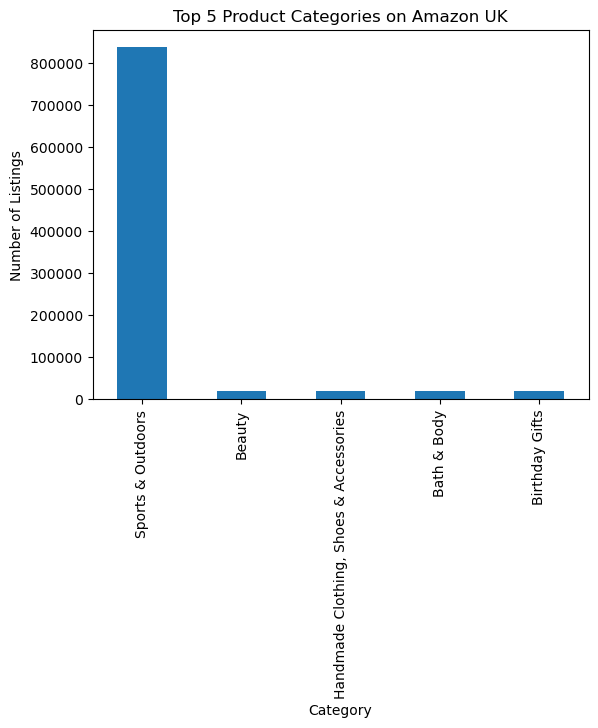

In [13]:
top_5_categories.plot(kind='bar')
plt.title('Top 5 Product Categories on Amazon UK')
plt.xlabel('Category')
plt.ylabel('Number of Listings')

Text(0.5, 1.0, 'Proportion of Top 5 Product Categories on Amazon UK')

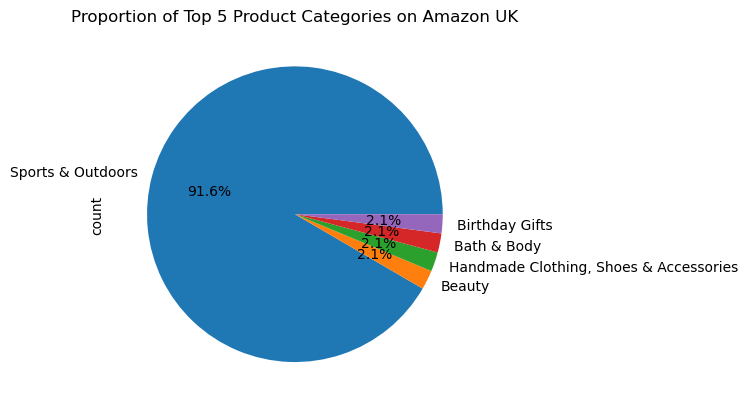

In [16]:
top_5_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Top 5 Product Categories on Amazon UK')

**Part 2: Delving into Product Pricing**
**Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?**

**1. Measures of Centrality:**
- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [17]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode() #(0 and 9.99)??

print(f"Mean: {mean_price}, Median: {median_price}, Mode: {mode_price}")

Mean: 89.24380943923663, Median: 19.09, Mode: 0    9.99
Name: price, dtype: float64


The average price point of products listed on Amazon UK is £89.24.
The most common price point (mode) is £9.99.
Comparing these two metrics reveals a significant difference between the average and the most common price points of products. This disparity suggests that the distribution of product prices is heavily skewed.

**2. Measures of Dispersion:**
- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [20]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = np.percentile(df['price'], 75) - np.percentile(df['price'], 25)

print(f"Variance: {variance_price}, Standard Deviation: {std_dev_price}, Range: {range_price}, IQR: {iqr_price}")

Variance: 119445.4853225653, Standard Deviation: 345.6088617535223, Range: 100000.0, IQR: 36.0


These indicators point to Amazon UK's highly varied pricing landscape, with some products priced significantly higher than others. The vast range and high standard deviation signify a considerable spread in price. At the same time,e the relatively minor IQR suggests that many products are clustered around a more narrow price band, even within such a diverse market. This variability could reflect the wide range of products offered on Amazon UK, from low-cost items to high-end luxury goods.

**3. Visualizations:**
- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

Text(0, 0.5, 'Number of Products')

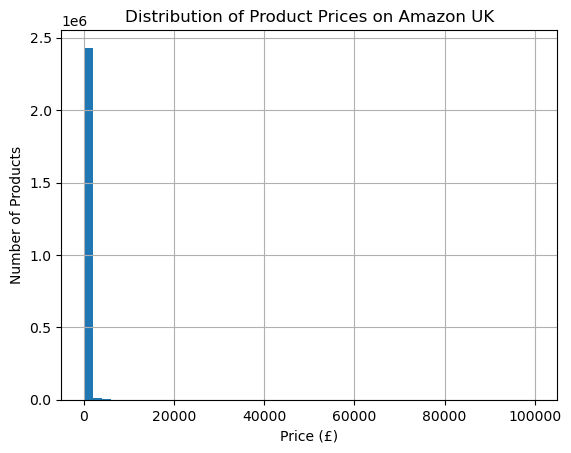

In [22]:
df['price'].hist(bins=50)
plt.title('Distribution of Product Prices on Amazon UK')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')

This histogram shows a clear concentration of product prices at the lower end of the price range, and the rest of the chart has barely any products extending to the higher price ranges up to £100,000. This high concentration in the lower price range makes it difficult to read the distribution for the rest of the prices. To improve we can do the following:

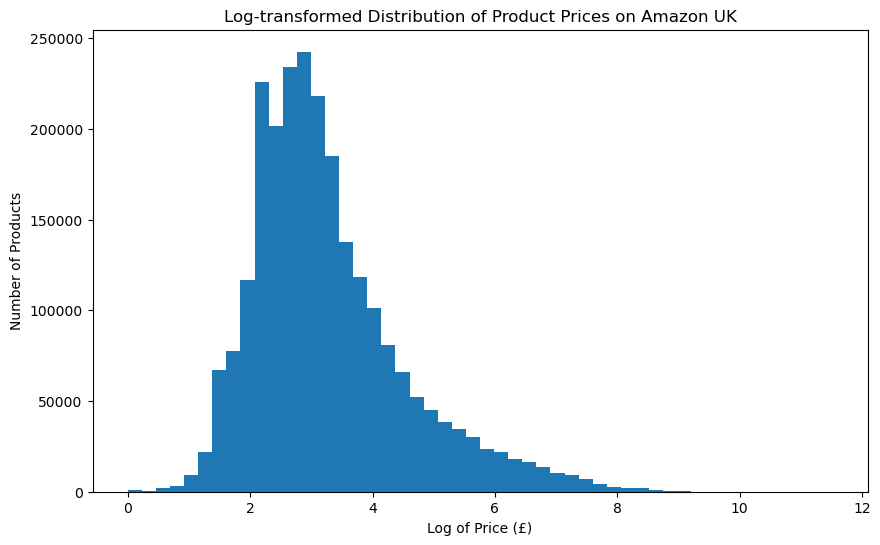

In [24]:
df['log_price'] = np.log1p(df['price'])

plt.figure(figsize=(10, 6))
df['log_price'].hist(bins=50)
plt.title('Log-transformed Distribution of Product Prices on Amazon UK')
plt.xlabel('Log of Price (£)')
plt.ylabel('Number of Products')
plt.grid(False)

Applying a log transformation to the prices before plotting the histogram can help deal with skewed data by compressing the scale and allowing for a better comparison across a wider range of prices.

Text(0, 0.5, 'Price (£)')

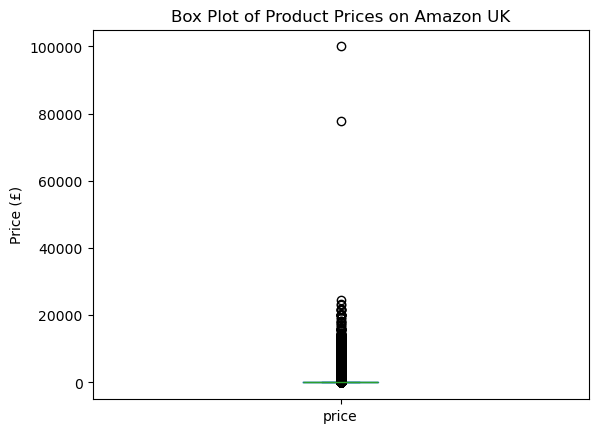

In [23]:
df['price'].plot(kind='box')
plt.title('Box Plot of Product Prices on Amazon UK')
plt.ylabel('Price (£)')

This visualization helps identify the range within which most products are priced, and it also clearly highlights the presence of high-priced items on the platform.

**Part 3: Unpacking Product Ratings**
**Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?**

**1. Measures of Centrality:**
- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

In [26]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()

print(f"Mean: {mean_rating}, Median: {median_rating}, Mode: {mode_rating}")

Mean: 2.152836472966065, Median: 0.0, Mode: 0    0.0
Name: stars, dtype: float64


With the median and mode at 0, it seems that more than half of the products have not received any ratings at all.
The mean rating is significantly low at 2.15, this indicates that, of the products that have been rated, the trend leans towards lower satisfaction or lower perceived quality.

**2. Measures of Dispersion:**
- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

In [27]:
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
iqr_rating = np.percentile(df['stars'], 75) - np.percentile(df['stars'], 25)

print(f"Variance: {variance_rating}, Standard Deviation: {std_dev_rating}, IQR: {iqr_rating}")

Variance: 4.81743402976196, Standard Deviation: 2.1948653785054697, IQR: 4.4


All these indicators show that there is a wide variation in customer feedback, with ratings ranging significantly from low to high. The ratings are not consistent, which might reflect diverse customer experiences or expectations. It could also signify a varied product mix with differing levels of quality or customer satisfaction.

**3. Shape of the Distribution:**
- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

In [28]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurt()

print(f"Skewness: {skewness_rating}, Kurtosis: {kurtosis_rating}")

Skewness: 0.08120735761080985, Kurtosis: -1.9260061280432985


The skewness and kurtosis values do not suggest a distribution that leans heavily toward higher or lower ratings.

**4. Visualizations:**
- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

Text(0, 0.5, 'Number of Products')

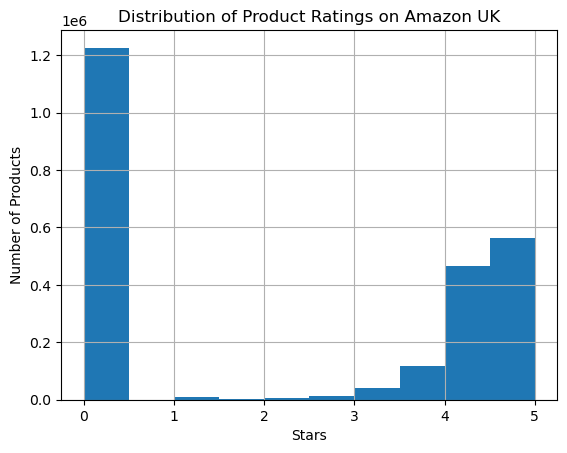

In [29]:
df['stars'].hist(bins=10)
plt.title('Distribution of Product Ratings on Amazon UK')
plt.xlabel('Stars')
plt.ylabel('Number of Products')

Yes, as we have already seen, the most common rating is 0.